### Principal Component Analisys
PCA is perfomred to reduce the dimensionality of the data while retaining most of the variance.
This help in symplifying the dataset, reducing noise and making it easier to visualize and interpret.

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    
    # Separate features and response variables
    features  = data.iloc[:, :11]
    features = features.drop('npz', axis=1)
    keff = data.iloc[:, -1]

    # Standarize features
    scaler = StandardScaler()
    data_std = scaler.fit_transform(features)

    return data_std, keff

def perform_pca(data_std, n_components=10):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_std)

    # Explained variance ratio and cumulative variance
    evr = pca.explained_variance_ratio_
    cev = evr.cumsum()

    return principal_components, evr, cev

def optimal_components(cev, var_to_keep):
    return np.argmax(cev >= var_to_keep) + 1

def main():
    data_std, keff = preprocess_data('ind_output_2D.csv')
    principal_components, evr, cev = perform_pca(data_std)

    # Determine optimal number of components
    var_to_keep = 0.99
    num_components = optimal_components(cev, var_to_keep)

    # Print results
    print(f'Explained variance ratio: {evr}')
    print(f'Cumulative explained variance: {cev}')
    print(f'Number of components to keep to explain {var_to_keep*100}% of variance: {num_components}')

    # Create a DF for principal components
    pca_df = pd.DataFrame(data=principal_components[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])
    print(pca_df.head())
    print(pca_df)
    return var_to_keep, pca_df
if __name__=='__main__':
    main()

Explained variance ratio: [8.25127886e-01 1.18414711e-01 2.98596220e-02 1.46249836e-02
 5.23275498e-03 4.28544942e-03 1.24815630e-03 1.12144323e-03
 5.48629666e-05 3.01306530e-05]
Cumulative explained variance: [0.82512789 0.9435426  0.97340222 0.9880272  0.99325996 0.99754541
 0.99879356 0.99991501 0.99996987 1.        ]
Number of components to keep to explain 99.0% of variance: 5
        PC1       PC2       PC3       PC4       PC5
0 -3.513526 -1.990622 -0.613432  0.578943 -0.002786
1 -3.515608 -1.990699 -0.616936  0.585835 -0.002801
2 -3.507990 -1.995223 -0.604969  0.563696 -0.002747
3 -3.520672 -1.940982 -0.628267  0.591124 -0.002911
4 -3.511732 -1.983935 -0.610948  0.571778 -0.002784
              PC1       PC2       PC3       PC4       PC5
0       -3.513526 -1.990622 -0.613432  0.578943 -0.002786
1       -3.515608 -1.990699 -0.616936  0.585835 -0.002801
2       -3.507990 -1.995223 -0.604969  0.563696 -0.002747
3       -3.520672 -1.940982 -0.628267  0.591124 -0.002911
4       -3.51

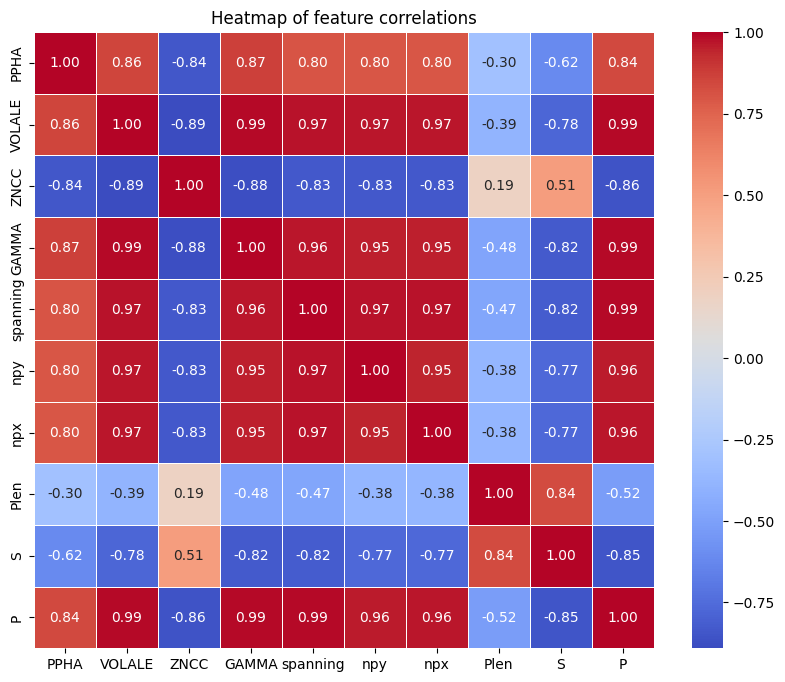

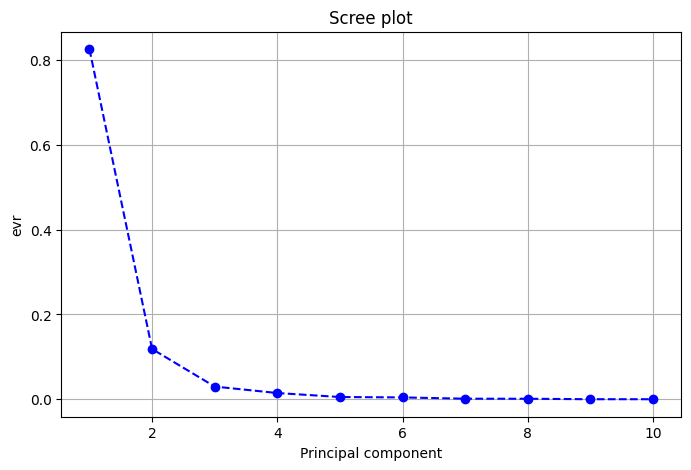

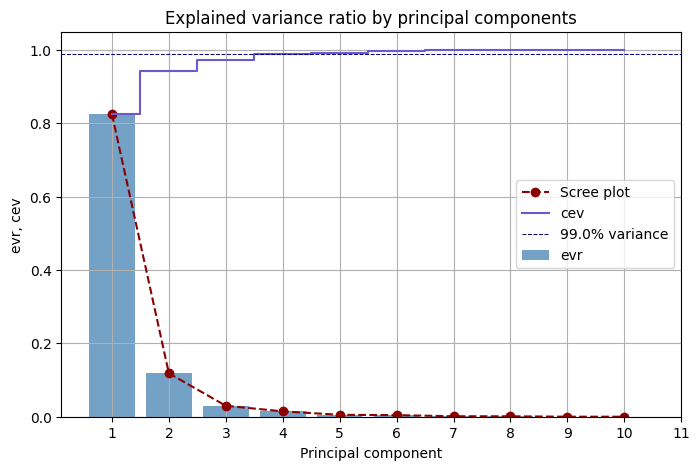

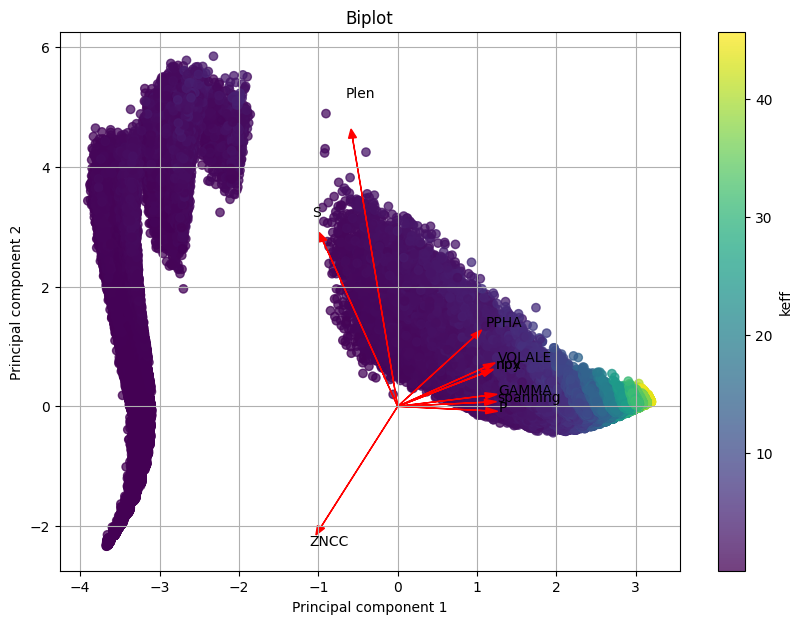

In [ ]:
### PCA results visualization
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(features):
    correlation_matrix = features.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of feature correlations')
    plt.show()
    plt.close()

def scree(evr):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(evr)+1), evr, marker= 'o', linestyle='--', color='b')
    plt.title('Scree plot')
    plt.xlabel('Principal component')
    plt.ylabel('evr')
    plt.grid(True)
    plt.show()
    plt.close()

def evr_cev(evr, cev, var_to_keep):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(evr)+1), evr, alpha=.75, align='center', label='evr', color='steelblue')
    plt.plot(range(1, len(evr)+1), evr, marker= 'o', linestyle='--', label= 'Scree plot', color='darkred')
    plt.step(range(1, len(evr)+1), cev, where='mid', label='cev', color='slateblue')
    plt.axhline(y=var_to_keep, color='navy', lw = .75, linestyle='dashed', label=f'{var_to_keep*100}% variance')
    plt.xlabel('Principal component')
    plt.xticks(range(1,12))
    plt.ylabel('evr, cev')
    plt.legend(loc='center right')
    plt.title('Explained variance ratio by principal components')
    plt.grid(True)
    plt.show()

def biplot(principal_components, pca, features, feature_names, keff):
    plt.figure(figsize=(10, 7))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=keff, cmap= 'viridis', alpha=0.75)
    plt.colorbar(label='keff')
    
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pca.components_[0, i]*max(principal_components[:, 0]), 
                  pca.components_[1, i]*max(principal_components[:, 1]),
                  color='r', head_width=0.1)
        plt.text(pca.components_[0, i]*max(principal_components[:, 0]) * 1.15, 
                 pca.components_[1, i]*max(principal_components[:, 1]) * 1.15, 
                 feature, color='k', fontsize=10, ha='left')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.title('Biplot')
    plt.grid(True)
    plt.show()

def pairplot(pca_df, keff):
    pca_df['keff'] = keff
    sns.pairplot(pca_df, diag_kind='kde', hue='keff', palette='viridis')
    plt.suptitle('Pairplot of proincipal component and keff', y = 1.02)
    plt.show()

def main():
    data_std, keff = preprocess_data('ind_output_2D.csv')
    principal_components, evr, cev = perform_pca(data_std)
    var_to_keep = 0.99
    
    data = pd.read_csv('ind_output_2D.csv')
    features = data.iloc[:, :11]
    features = features.drop('npz', axis=1)
    keff = data.iloc[:, -1]
    feature_names = features.columns[:10]
    pca = PCA(n_components=10)
    pca.fit(data_std)

    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(10)])

    heatmap(features)

    scree(evr)
    
    evr_cev(evr, cev, var_to_keep)

    biplot(principal_components, pca, pd.DataFrame(data_std, columns=feature_names), feature_names, keff)

    #pairplot(pca_df, keff) # tarda mucho, mas de 25 min y el grafico no salio

if __name__ == "__main__":
    main()

In [ ]:
##### 3D Biplot with subsample of data to reduce rendering time ###

import numpy as np
import plotly.graph_objects as go

def biplot_3D_plotly_optimized(principal_components, pca, feature_names, keff, subsample=10000):
    # Subsample the data points if necessary
    if principal_components.shape[0] > subsample:
        idx = np.random.choice(principal_components.shape[0], subsample, replace=False)
        pc_subset = principal_components[idx]
        keff_subset = keff.iloc[idx]
    else:
        pc_subset = principal_components
        keff_subset = keff

    fig = go.Figure()

    # Add the subsampled points
    fig.add_trace(go.Scatter3d(
        x=pc_subset[:, 0],
        y=pc_subset[:, 1],
        z=pc_subset[:, 2],
        mode='markers',
        marker=dict(
            size=3,  # Reduced marker size
            color=keff_subset,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title='keff')
        ),
        name='Observations'
    ))

    # Add variable vectors as a single trace
    arrow_x = [0]
    arrow_y = [0]
    arrow_z = [0]
    for i in range(len(feature_names)):
        arrow_x.extend([pca.components_[0, i] * max(pc_subset[:, 0]), None])
        arrow_y.extend([pca.components_[1, i] * max(pc_subset[:, 1]), None])
        arrow_z.extend([pca.components_[2, i] * max(pc_subset[:, 2]), None])

    fig.add_trace(go.Scatter3d(
        x=arrow_x,
        y=arrow_y,
        z=arrow_z,
        mode='lines',
        line=dict(color='red', width=2),
        name='Variable Arrows'
    ))

    # Add static text for variable names
    for i, feature in enumerate(feature_names):
        fig.add_trace(go.Scatter3d(
            x=[pca.components_[0, i] * max(pc_subset[:, 0])],
            y=[pca.components_[1, i] * max(pc_subset[:, 1])],
            z=[pca.components_[2, i] * max(pc_subset[:, 2])],
            mode='text',
            text=[feature],
            textposition='top center',
            showlegend=False
        ))

    # Update layout
    fig.update_layout(
        title='Optimized 3D Biplot (PCA)',
        scene=dict(
            xaxis_title='PC1',
            yaxis_title='PC2',
            zaxis_title='PC3'
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        legend=dict(title='Legend')
    )

    fig.show()  #(renderer='browser')

def main():
    data_std, keff = preprocess_data('ind_output_2D.csv')
    principal_components, evr, cev = perform_pca(data_std)
    
    data = pd.read_csv('ind_output_2D.csv')
    features = data.iloc[:, :11].drop('npz', axis=1)
    keff = data.iloc[:, -1]
    feature_names = features.columns[:10]
    pca = PCA(n_components=3)  # Use 3 components for 3D visualization
    pca.fit(data_std)

    # Call the optimized 3D biplot function
    biplot_3D_plotly_optimized(principal_components, pca, feature_names, keff)

